# Лабораторная работа №4. Проведение исследований с алгоритмом Random Forest

## Создание бейзлайна и оценка качества

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, r2_score)

from sklearn.metrics import ConfusionMatrixDisplay

### Классификация

Загрузка датасета

In [2]:
df_class = pd.read_csv('datasets/online_shoppers_intention.csv')

Размер датасета

In [3]:
df_class.shape

(12330, 18)

Первые 5 строк

In [4]:
df_class.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Информация о данных

In [5]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Статистика по числовым признакам

In [6]:
df_class.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Определение баланса классов

In [7]:
df_class['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

Копирование датасета для его дальнейшего преобразования

In [8]:
df_class_clean = df_class.copy()

Кодирование категориальных признаков с помощью `LabelEncoder`

In [ ]:
categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le
    print(f"  Закодирована колонка: {col}")

  Закодирована колонка: Month
  Закодирована колонка: VisitorType


Выделение признаков и таргета, их разделение на выборки для обучения и тестирования

In [11]:
X = df_class_clean.drop('Revenue', axis=1)
y = df_class_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nРазмеры выборок:")
print(f"  Обучающая выборка: {X_train.shape}")
print(f"  Тестовая выборка: {X_test.shape}")
print(f"  Распределение классов в train: {np.bincount(y_train)}")
print(f"  Распределение классов в test: {np.bincount(y_test)}")


Размеры выборок:
  Обучающая выборка: (8631, 17)
  Тестовая выборка: (3699, 17)
  Распределение классов в train: [7295 1336]
  Распределение классов в test: [3127  572]


Обучение модели классификации `RandomForestClassifier`

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

Вычисление метрик

Accuracy (точность): 0.9005
F1-Score: 0.6364
ROC-AUC: 0.9133

Матрица ошибок:
[[3009  118]
 [ 250  322]]


<Figure size 800x600 with 0 Axes>

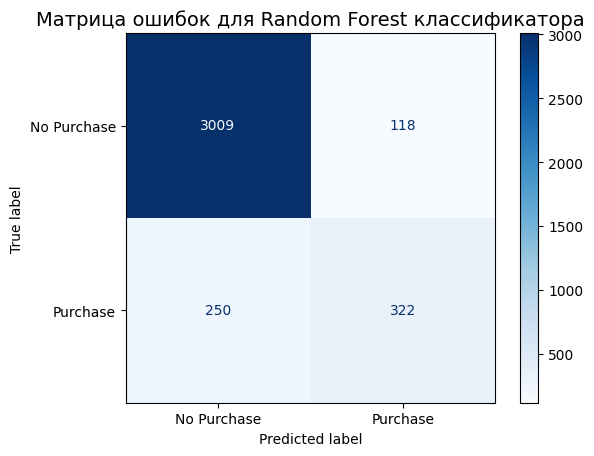

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print("\nМатрица ошибок:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Визуализация матрицы ошибок

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues')
plt.title('Матрица ошибок для Random Forest классификатора', fontsize=14)
plt.show()

Дополнительная оценка результатов модели

In [ ]:
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f"  Precision: {precision:.3f}")
print(f"    - Из {TP+FP} предсказанных покупок, {TP} были верными")
print(f"  Recall: {recall:.3f}")
print(f"    - Из {TP+FN} реальных покупок, нашли {TP}")

1. Модель правильно предсказывает 90.1% всех сессий
2. F1-Score = 0.636 (баланс между точностью и полнотой)
3. ROC-AUC = 0.913 (чем ближе к 1, тем лучше модель различает классы)

Дополнительные метрики из матрицы ошибок:
  Precision (точность): 0.732
    - Из 440 предсказанных покупок, 322 были верными
  Recall (полнота): 0.563
    - Из 572 реальных покупок, нашли 322
  False Positive Rate: 0.038
  False Negative Rate: 0.437


### Регрессия

Загрузка датасета

In [15]:
df_reg = pd.read_csv('datasets/parkinsons.csv')

Размер датасета

In [16]:
df_reg.shape

(5875, 22)

Первые 5 строк

In [17]:
df_reg.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Информация о данных

In [18]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Статистика по числовым признакам

In [19]:
df_reg.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Копирование датасета для его дальнейшего преобразования. Удаление столбца `subject#`, т.к. не несёт полезной информации

In [20]:
df_reg_clean = df_reg.copy()

df_reg_clean = df_reg_clean.drop('subject#', axis=1)

Выделение признаков и таргета, их разделение на выборки для обучения и тестирования

In [ ]:
X = df_reg_clean.drop('total_UPDRS', axis=1)
y = df_reg_clean['total_UPDRS']

print(f"Количество признаков: {X.shape[1]}")
print(f"Диапазон целевой переменной: [{y.min():.2f}, {y.max():.2f}]")
print(f"Среднее значение целевой переменной: {y.mean():.2f}")
print(f"Стандартное отклонение целевой переменной: {y.std():.2f}")

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nРазмеры выборок:")
print(f"  Обучающая выборка: {X_train_reg.shape}")
print(f"  Тестовая выборка: {X_test_reg.shape}")

Количество признаков: 20
Диапазон целевой переменной: [7.00, 54.99]
Среднее значение целевой переменной: 29.02
Стандартное отклонение целевой переменной: 10.70


Обучение модели регрессии `RandomForestRegressor`

In [23]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg)

Вычисление метрик

MSE (среднеквадратичная ошибка): 0.1998
RMSE (корень из MSE): 0.4470
MAE (средняя абсолютная ошибка): 0.2310
R² (коэффициент детерминации): 0.9982


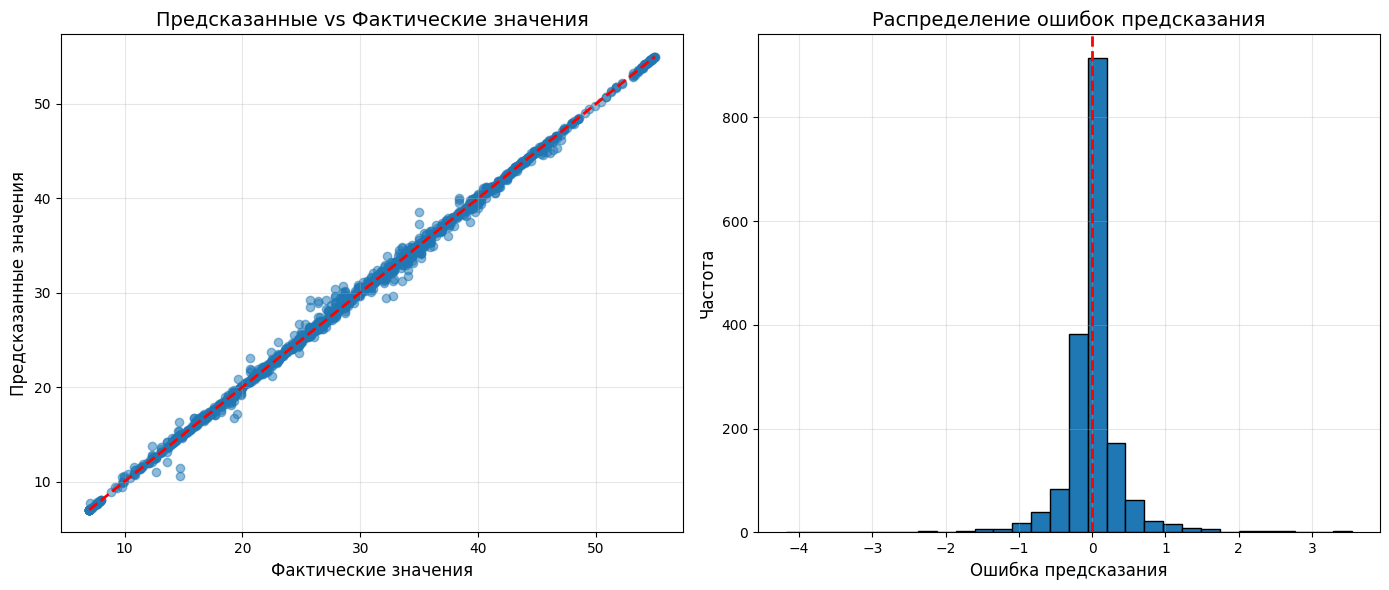

In [ ]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

Визуализация предсказаний

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Фактические значения', fontsize=12)
axes[0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0].set_title('Предсказанные vs Фактические значения', fontsize=14)
axes[0].grid(True, alpha=0.3)

errors = y_pred_reg - y_test_reg
axes[1].hist(errors, bins=30, edgecolor='black')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Ошибка предсказания', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].set_title('Распределение ошибок предсказания', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Результаты базовых моделей

In [ ]:
print("\nКлассификация")
print("Метрики:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- F1-Score: {f1:.4f}")
print(f"- ROC-AUC:  {roc_auc:.4f}")

print("\nРегрессия")
print("Метрики:")
print(f"- MSE:  {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- MAE:  {mae:.4f}")
print(f"- R²:   {r2:.4f}")


СВОДКА РЕЗУЛЬТАТОВ БЕЙЗЛАЙН МОДЕЛЕЙ RANDOM FOREST

1. КЛАССИФИКАЦИЯ (Online Shoppers):
   Модель: RandomForestClassifier с n_estimators=100
   Метрики:
     - Accuracy: 0.9005
     - F1-Score: 0.6364
     - ROC-AUC:  0.9133

2. РЕГРЕССИЯ (Parkinson's Disease):
   Модель: RandomForestRegressor с n_estimators=100
   Метрики:
     - MSE:  0.1998
     - RMSE: 0.4470
     - MAE:  0.2310
     - R²:   0.9982


## Улучшение бейзлайна

In [27]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_curve

import warnings

warnings.filterwarnings('ignore')

### Классификация

Сохранение метрик базовой модели

In [28]:
class_base_metrics = {
    'Accuracy': accuracy,
    'F1': f1,
    'ROC-AUC': roc_auc,
    'Precision': precision,
    'Recall': recall
}

Функция сравнения метрик новой модели с базовой

In [29]:
def print_comparison_class(metrics_old, metrics_new):
    comparison_data = []
    for metric in ['Accuracy', 'F1', 'ROC-AUC', 'Precision', 'Recall']:
        base_val = metrics_old[metric]
        new_val = metrics_new[metric]
        diff = new_val - base_val
        change = "улучшение" if diff > 0 else "ухудшение"
        
        comparison_data.append({
            'Метрика': metric,
            'Базовая модель': f"{base_val:.4f}",
            'Новая модель': f"{new_val:.4f}",
            'Разница': f"{diff:+.4f}",
            'Изменение': change
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.to_string(index=False))

Повторное копирование и разбиение данных

In [30]:
df_class_clean = df_class.copy()

categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le

X = df_class_clean.drop('Revenue', axis=1)
y = df_class_clean['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Гипотеза 1: Балансировка классов с class_weight='balanced'

In [31]:
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_balanced.fit(X_train, y_train)
y_pred_bal = rf_balanced.predict(X_test)
y_proba_bal = rf_balanced.predict_proba(X_test)[:, 1]

metrics_bal = {
    'Accuracy': accuracy_score(y_test, y_pred_bal),
    'F1': f1_score(y_test, y_pred_bal),
    'ROC-AUC': roc_auc_score(y_test, y_proba_bal),
    'Precision': precision_score(y_test, y_pred_bal),
    'Recall': recall_score(y_test, y_pred_bal)
}

print("Балансировка классов с class_weight='balanced'")
print_comparison_class(class_base_metrics, metrics_bal)

Балансировка классов с class_weight='balanced'
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.9005       0.8975 -0.0030 ухудшение
       F1         0.6364       0.6168 -0.0196 ухудшение
  ROC-AUC         0.9133       0.9180 +0.0048 улучшение
Precision         0.7318       0.7314 -0.0004 ухудшение
   Recall         0.5629       0.5332 -0.0297 ухудшение


Гипотеза 2: Увеличение числа деревьев (n_estimators)

In [32]:
rf_many_trees = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf_many_trees.fit(X_train, y_train)
y_pred_trees = rf_many_trees.predict(X_test)
y_proba_trees = rf_many_trees.predict_proba(X_test)[:, 1]

metrics_trees = {
    'Accuracy': accuracy_score(y_test, y_pred_trees),
    'F1': f1_score(y_test, y_pred_trees),
    'ROC-AUC': roc_auc_score(y_test, y_proba_trees),
    'Precision': precision_score(y_test, y_pred_trees),
    'Recall': recall_score(y_test, y_pred_trees)
}

print("Увеличение числа деревьев до 300 с балансировкой")
print_comparison_class(class_base_metrics, metrics_trees)

Увеличение числа деревьев до 300 с балансировкой
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.9005       0.8994 -0.0011 ухудшение
       F1         0.6364       0.6196 -0.0167 ухудшение
  ROC-AUC         0.9133       0.9198 +0.0065 улучшение
Precision         0.7318       0.7463 +0.0145 улучшение
   Recall         0.5629       0.5297 -0.0332 ухудшение


Гипотеза 3: Подбор гиперпараметров (max_depth, min_samples_split, max_features)

In [33]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

rf_gs = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_gs, param_distributions=param_grid_rf, n_iter=30, cv=5,
    scoring='roc_auc', random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

print("Лучшие параметры Random Forest:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

best_rf = random_search.best_estimator_
y_pred_gs = best_rf.predict(X_test)
y_proba_gs = best_rf.predict_proba(X_test)[:, 1]

metrics_gs = {
    'Accuracy': accuracy_score(y_test, y_pred_gs),
    'F1': f1_score(y_test, y_pred_gs),
    'ROC-AUC': roc_auc_score(y_test, y_proba_gs),
    'Precision': precision_score(y_test, y_pred_gs),
    'Recall': recall_score(y_test, y_pred_gs)
}

print("\nПодбор гиперпараметров Random Forest")
print_comparison_class(class_base_metrics, metrics_gs)

Лучшие параметры Random Forest:
  random_state: 42
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 4
  max_features: sqrt
  max_depth: 30
  class_weight: balanced

Подбор гиперпараметров Random Forest
  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.9005       0.8840 -0.0165 ухудшение
       F1         0.6364       0.6521 +0.0157 улучшение
  ROC-AUC         0.9133       0.9230 +0.0097 улучшение
Precision         0.7318       0.6082 -0.1236 ухудшение
   Recall         0.5629       0.7028 +0.1399 улучшение


Формирование улучшенной модели и её обучение

In [34]:
best_params = random_search.best_params_.copy()

improved_rf = RandomForestClassifier(**best_params)
improved_rf.fit(X_train, y_train)

y_pred_improved = improved_rf.predict(X_test)
y_pred_proba_improved = improved_rf.predict_proba(X_test)[:, 1]

Метрики улучшенной модели

In [35]:
class_improved_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_improved),
    'F1': f1_score(y_test, y_pred_improved),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_improved),
    'Precision': precision_score(y_test, y_pred_improved),
    'Recall': recall_score(y_test, y_pred_improved)
}

for metric, value in class_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8840
F1: 0.6521
ROC-AUC: 0.9230
Precision: 0.6082
Recall: 0.7028


Сравнение улучшенной модели с базовой

In [36]:
print_comparison_class(class_base_metrics, class_improved_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.9005       0.8840 -0.0165 ухудшение
       F1         0.6364       0.6521 +0.0157 улучшение
  ROC-AUC         0.9133       0.9230 +0.0097 улучшение
Precision         0.7318       0.6082 -0.1236 ухудшение
   Recall         0.5629       0.7028 +0.1399 улучшение


Визуальное сравнение базовой и улучшенной модели

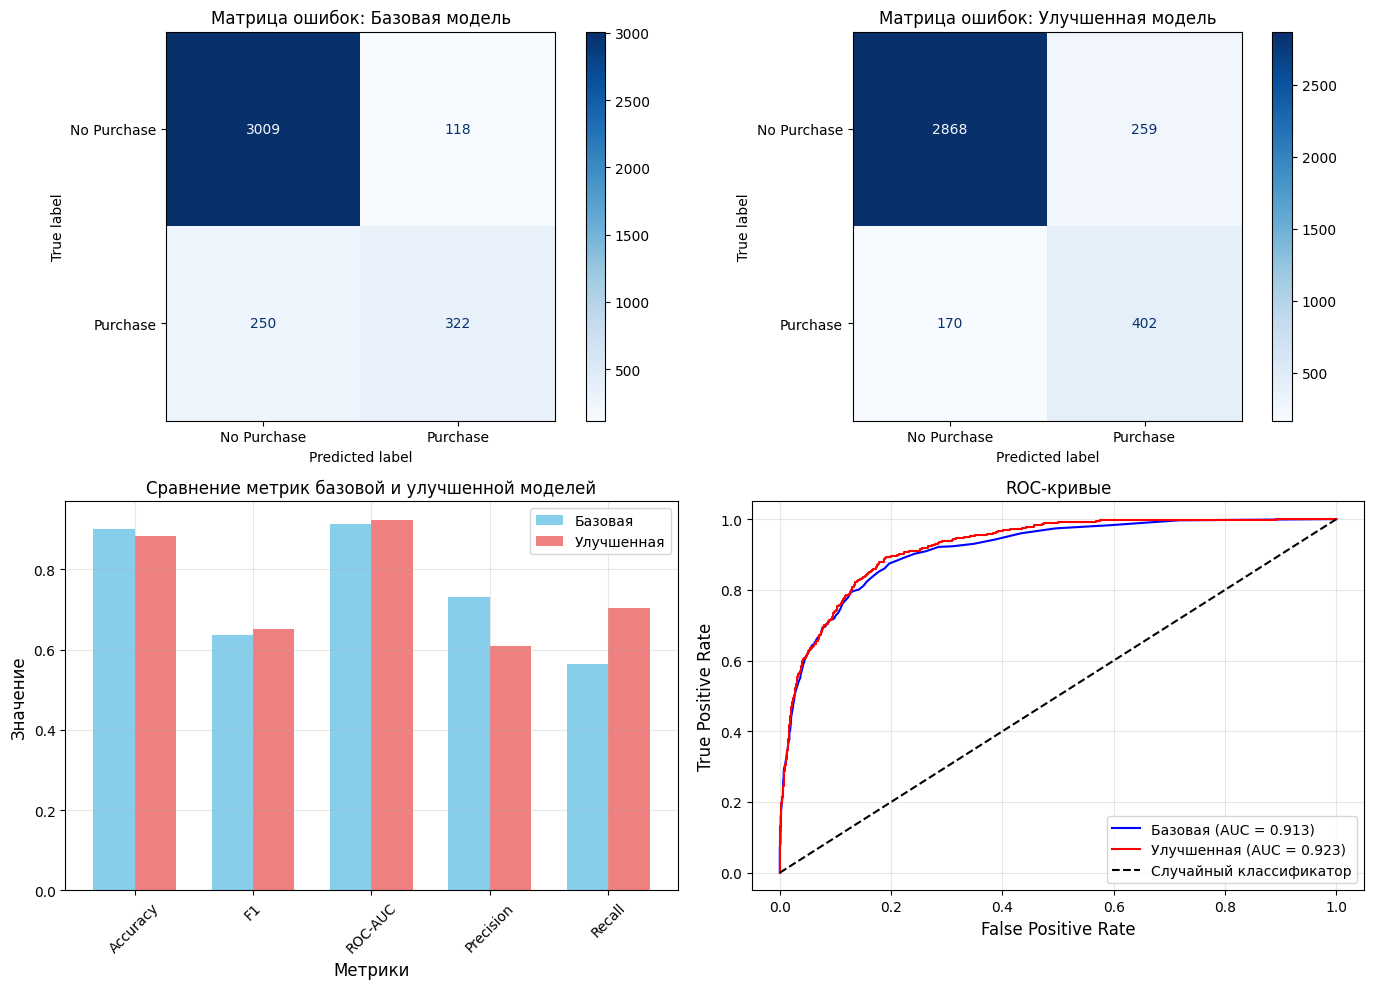

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].set_title('Матрица ошибок: Базовая модель', fontsize=12)
cm_base = confusion_matrix(y_test, y_pred)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, 
                                  display_labels=['No Purchase', 'Purchase'])
disp_base.plot(ax=axes[0, 0], cmap='Blues')

axes[0, 1].set_title('Матрица ошибок: Улучшенная модель', fontsize=12)
cm_improved = confusion_matrix(y_test, y_pred_improved)
disp_improved = ConfusionMatrixDisplay(confusion_matrix=cm_improved, 
                                       display_labels=['No Purchase', 'Purchase'])
disp_improved.plot(ax=axes[0, 1], cmap='Blues')

metrics_names = ['Accuracy', 'F1', 'ROC-AUC', 'Precision', 'Recall']
base_values = [class_base_metrics[m] for m in metrics_names]
improved_values = [class_improved_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 0].bar(x - width/2, base_values, width, label='Базовая', color='skyblue')
axes[1, 0].bar(x + width/2, improved_values, width, label='Улучшенная', color='lightcoral')
axes[1, 0].set_xlabel('Метрики', fontsize=12)
axes[1, 0].set_ylabel('Значение', fontsize=12)
axes[1, 0].set_title('Сравнение метрик базовой и улучшенной моделей', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_proba)
fpr_improved, tpr_improved, _ = roc_curve(y_test, y_pred_proba_improved)

axes[1, 1].plot(fpr_base, tpr_base, label=f'Базовая (AUC = {roc_auc:.3f})', color='blue')
axes[1, 1].plot(fpr_improved, tpr_improved, label=f'Улучшенная (AUC = {class_improved_metrics["ROC-AUC"]:.3f})', color='red')
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
axes[1, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[1, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[1, 1].set_title('ROC-кривые', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Анализ результатов классификации и важность признаков


1. Анализ обнаружения покупок:
   Базовая модель нашла 322 из 572 реальных покупок
   Улучшенная модель нашла 402 из 572 реальных покупок
   Улучшение в обнаружении покупок: 80 реальных покупок
   Процентное улучшение Recall: +14.0%

2. Анализ ложных срабатываний:
   Базовая модель: 118 ложных предсказаний покупки
   Улучшенная модель: 259 ложных предсказаний покупки
   Изменение: 141 дополнительных ложных срабатываний

3. Важность признаков (топ-10):
                Признак  Важность
             PageValues  0.473861
              ExitRates  0.089786
ProductRelated_Duration  0.084741
         ProductRelated  0.062820
                  Month  0.058943
            BounceRates  0.051630
Administrative_Duration  0.042138
         Administrative  0.031956
            TrafficType  0.020072
                 Region  0.018483


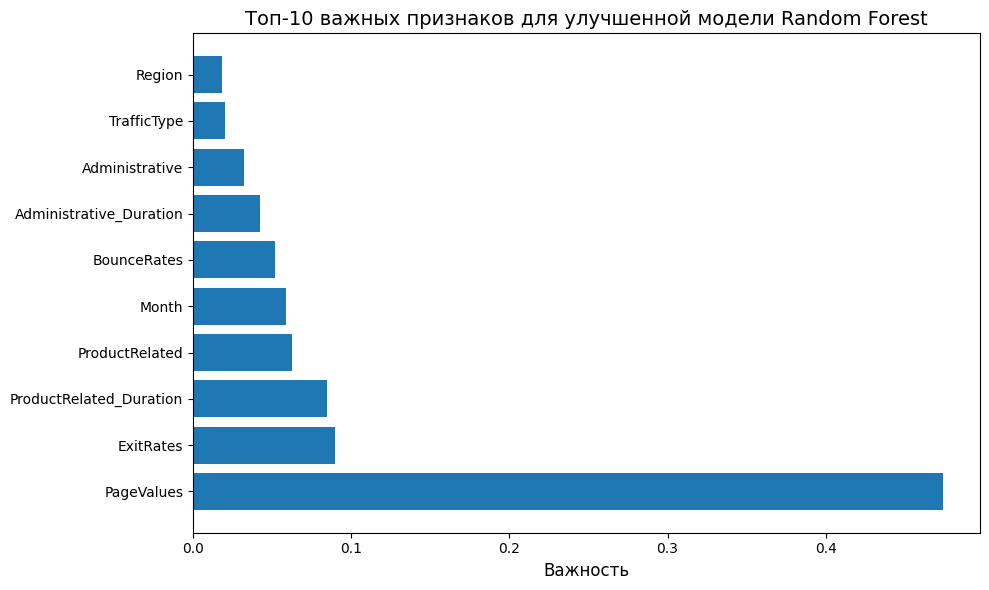

In [38]:
TN_base, FP_base, FN_base, TP_base = cm_base.ravel()
TN_imp, FP_imp, FN_imp, TP_imp = cm_improved.ravel()

print("\n1. Анализ обнаружения покупок:")
print(f"   Базовая модель нашла {TP_base} из {TP_base + FN_base} реальных покупок")
print(f"   Улучшенная модель нашла {TP_imp} из {TP_imp + FN_imp} реальных покупок")
print(f"   Улучшение в обнаружении покупок: {TP_imp - TP_base} реальных покупок")
print(f"   Процентное улучшение Recall: {((TP_imp / (TP_imp + FN_imp)) - (TP_base / (TP_base + FN_base))) * 100:+.1f}%")

print("\n2. Анализ ложных срабатываний:")
print(f"   Базовая модель: {FP_base} ложных предсказаний покупки")
print(f"   Улучшенная модель: {FP_imp} ложных предсказаний покупки")
print(f"   Изменение: {FP_imp - FP_base} дополнительных ложных срабатываний")

print("\n3. Важность признаков (топ-10):")
feature_importance_df = pd.DataFrame({
    'Признак': X.columns,
    'Важность': improved_rf.feature_importances_
}).sort_values('Важность', ascending=False).head(10)

print(feature_importance_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Признак'], feature_importance_df['Важность'])
plt.xlabel('Важность', fontsize=12)
plt.title('Топ-10 важных признаков для улучшенной модели Random Forest', fontsize=14)
plt.tight_layout()
plt.show()

### Регрессия

Сохранение метрик базовой модели

In [39]:
reg_base_metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R²': r2
}

Функция сравнения метрик новой модели с базовой

In [40]:
def print_comparison_reg(metrics_old, metrics_new):
    comparison_data = []
    for metric in ['MSE', 'RMSE', 'MAE', 'R²']:
        base_val = metrics_old[metric]
        new_val = metrics_new[metric]
        diff = new_val - base_val
        if metric == 'R²':
            change = "улучшение" if diff > 0 else "ухудшение"
        else:
            change = "улучшение" if diff < 0 else "ухудшение"
        
        comparison_data.append({
            'Метрика': metric,
            'Базовая модель': f"{base_val:.4f}",
            'Новая модель': f"{new_val:.4f}",
            'Разница': f"{diff:+.4f}",
            'Изменение': change
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.to_string(index=False))

Повторное копирование и подготовка данных

In [41]:
df_reg_clean = df_reg.copy()
df_reg_clean = df_reg_clean.drop('subject#', axis=1)

X = df_reg_clean.drop('total_UPDRS', axis=1)
y = df_reg_clean['total_UPDRS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Гипотеза 1: Увеличение числа деревьев (n_estimators)

In [42]:
rf_reg_trees = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg_trees.fit(X_train, y_train)
y_pred_trees_reg = rf_reg_trees.predict(X_test)

metrics_trees_reg = {
    'MSE': mean_squared_error(y_test, y_pred_trees_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_trees_reg)),
    'MAE': mean_absolute_error(y_test, y_pred_trees_reg),
    'R²': r2_score(y_test, y_pred_trees_reg)
}

print("Увеличение числа деревьев до 300")
print_comparison_reg(reg_base_metrics, metrics_trees_reg)

Увеличение числа деревьев до 300
Метрика Базовая модель Новая модель Разница Изменение
    MSE         0.1998       0.2012 +0.0014 ухудшение
   RMSE         0.4470       0.4485 +0.0016 ухудшение
    MAE         0.2310       0.2319 +0.0008 ухудшение
     R²         0.9982       0.9982 -0.0000 ухудшение


Гипотеза 2: Подбор гиперпараметров для регрессора

In [43]:
param_grid_rf_reg = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42]
}

rf_reg_gs = RandomForestRegressor(random_state=42)
random_search_reg = RandomizedSearchCV(
    estimator=rf_reg_gs, param_distributions=param_grid_rf_reg, n_iter=30, cv=5,
    scoring='r2', random_state=42, n_jobs=-1
)
random_search_reg.fit(X_train, y_train)

print("Лучшие параметры Random Forest для регрессии:")
for param, value in random_search_reg.best_params_.items():
    print(f"  {param}: {value}")

best_rf_reg = random_search_reg.best_estimator_
y_pred_gs_reg = best_rf_reg.predict(X_test)

metrics_gs_reg = {
    'MSE': mean_squared_error(y_test, y_pred_gs_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gs_reg)),
    'MAE': mean_absolute_error(y_test, y_pred_gs_reg),
    'R²': r2_score(y_test, y_pred_gs_reg)
}

print("\nПодбор гиперпараметров Random Forest")
print_comparison_reg(reg_base_metrics, metrics_gs_reg)

Лучшие параметры Random Forest для регрессии:
  random_state: 42
  n_estimators: 100
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: None
  max_depth: 20

Подбор гиперпараметров Random Forest
Метрика Базовая модель Новая модель Разница Изменение
    MSE         0.1998       0.2040 +0.0042 ухудшение
   RMSE         0.4470       0.4516 +0.0047 ухудшение
    MAE         0.2310       0.2334 +0.0024 ухудшение
     R²         0.9982       0.9982 -0.0000 ухудшение


Формирование улучшенной модели и её обучение

In [44]:
best_params_reg = random_search_reg.best_params_.copy()

improved_rf_reg = RandomForestRegressor(**best_params_reg)
improved_rf_reg.fit(X_train, y_train)

y_pred_improved_reg = improved_rf_reg.predict(X_test)

Метрики улучшенной модели

In [45]:
reg_improved_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_improved_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_improved_reg)),
    'MAE': mean_absolute_error(y_test, y_pred_improved_reg),
    'R²': r2_score(y_test, y_pred_improved_reg)
}

for metric, value in reg_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 0.2040
RMSE: 0.4516
MAE: 0.2334
R²: 0.9982


Сравнение улучшенной модели с базовой

In [46]:
print_comparison_reg(reg_base_metrics, reg_improved_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE         0.1998       0.2040 +0.0042 ухудшение
   RMSE         0.4470       0.4516 +0.0047 ухудшение
    MAE         0.2310       0.2334 +0.0024 ухудшение
     R²         0.9982       0.9982 -0.0000 ухудшение


Визуальное сравнение базовой и улучшенной модели

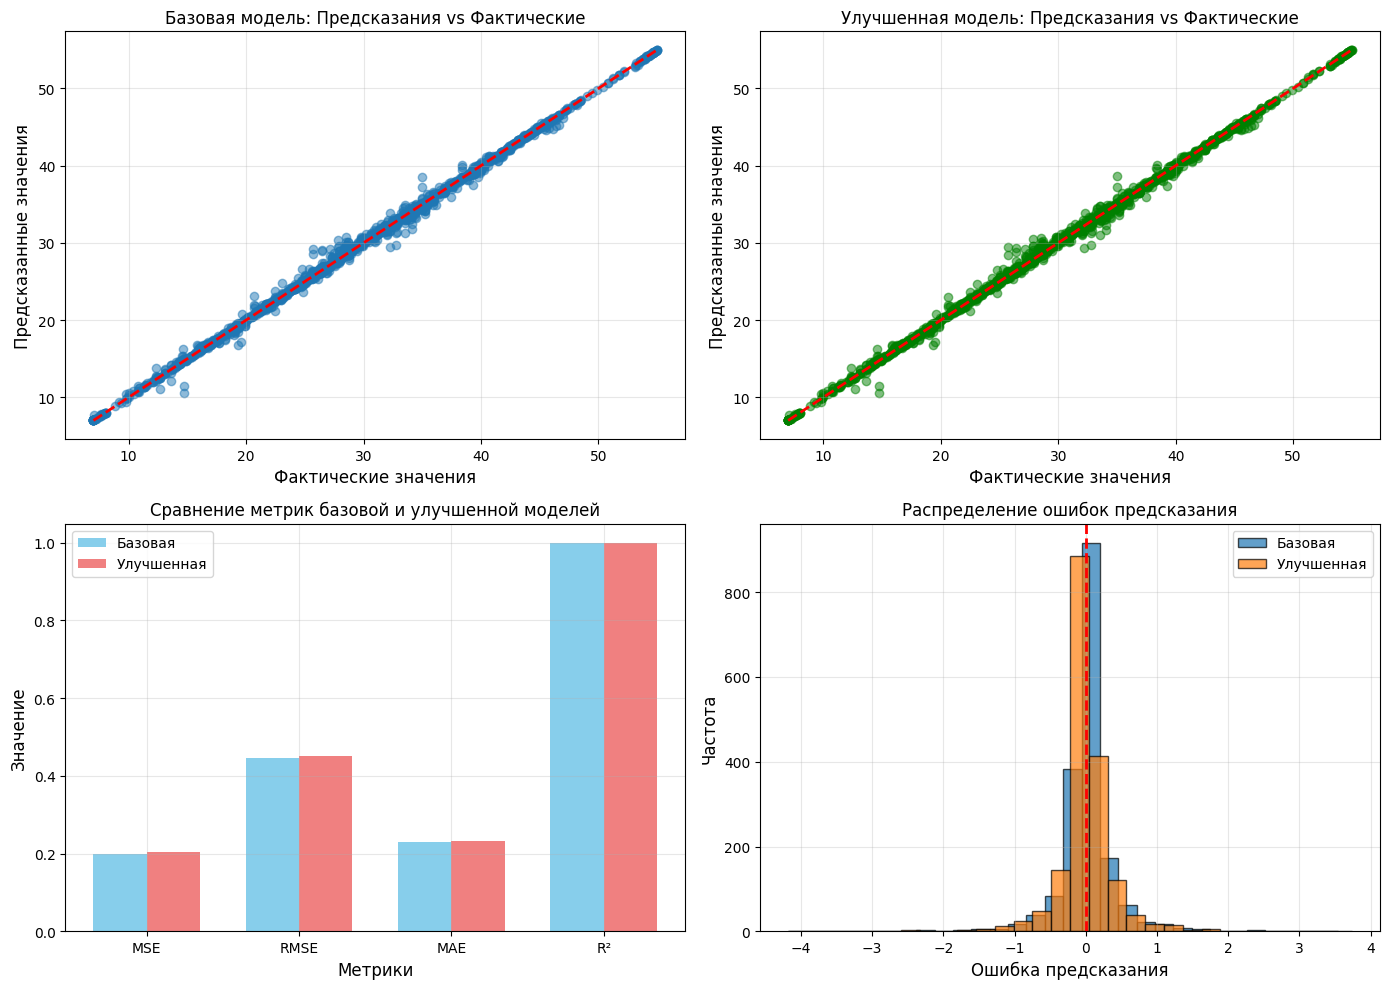

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(y_test, y_pred_reg, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 0].set_xlabel('Фактические значения', fontsize=12)
axes[0, 0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0, 0].set_title('Базовая модель: Предсказания vs Фактические', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(y_test, y_pred_improved_reg, alpha=0.5, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2)
axes[0, 1].set_xlabel('Фактические значения', fontsize=12)
axes[0, 1].set_ylabel('Предсказанные значения', fontsize=12)
axes[0, 1].set_title('Улучшенная модель: Предсказания vs Фактические', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

metrics_names = ['MSE', 'RMSE', 'MAE', 'R²']
base_values = [reg_base_metrics[m] for m in metrics_names]
improved_values = [reg_improved_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, base_values, width, label='Базовая', color='skyblue')
bars2 = axes[1, 0].bar(x + width/2, improved_values, width, label='Улучшенная', color='lightcoral')
axes[1, 0].set_xlabel('Метрики', fontsize=12)
axes[1, 0].set_ylabel('Значение', fontsize=12)
axes[1, 0].set_title('Сравнение метрик базовой и улучшенной моделей', fontsize=12)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

errors_base = y_pred_reg - y_test
errors_improved = y_pred_improved_reg - y_test

axes[1, 1].hist(errors_base, bins=30, alpha=0.7, label='Базовая', edgecolor='black')
axes[1, 1].hist(errors_improved, bins=30, alpha=0.7, label='Улучшенная', edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Ошибка предсказания', fontsize=12)
axes[1, 1].set_ylabel('Частота', fontsize=12)
axes[1, 1].set_title('Распределение ошибок предсказания', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Анализ результатов регрессии и важность признаков


1. Анализ улучшения модели:
   R² увеличился с 0.9982 до 0.9982
   Улучшение R²: -0.0000
   MSE уменьшился с 0.1998 до 0.2040
   Улучшение MSE: -0.0042 (-2.09%)

2. Статистика ошибок улучшенной модели:
   Средняя абсолютная ошибка: 0.23
   Средняя ошибка в процентах от среднего target: 0.80%
   Стандартное отклонение ошибок: 0.45

3. Важность признаков (топ-10):
     Признак  Важность
 motor_UPDRS  0.914876
         age  0.045546
   test_time  0.018116
         sex  0.009222
         DFA  0.006052
         HNR  0.001426
        RPDE  0.000842
 Jitter(Abs)  0.000757
         PPE  0.000630
Shimmer:APQ5  0.000389


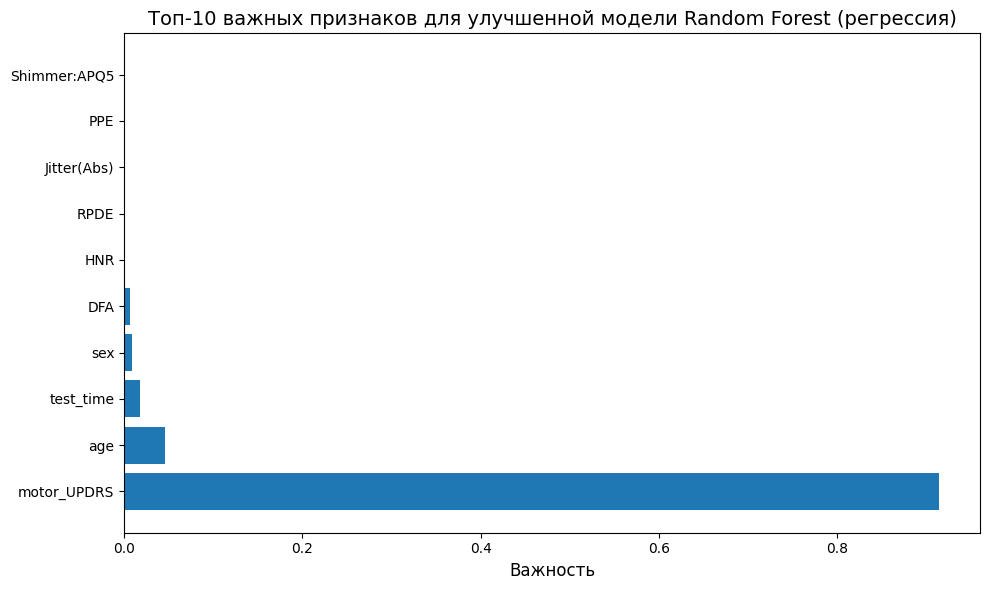

In [48]:
print(f"\n1. Анализ улучшения модели:")
print(f"   R² увеличился с {reg_base_metrics['R²']:.4f} до {reg_improved_metrics['R²']:.4f}")
print(f"   Улучшение R²: {reg_improved_metrics['R²'] - reg_base_metrics['R²']:+.4f}")
print(f"   MSE уменьшился с {reg_base_metrics['MSE']:.4f} до {reg_improved_metrics['MSE']:.4f}")
print(f"   Улучшение MSE: {reg_base_metrics['MSE'] - reg_improved_metrics['MSE']:.4f} ({(1 - reg_improved_metrics['MSE']/reg_base_metrics['MSE'])*100:.2f}%)")

print(f"\n2. Статистика ошибок улучшенной модели:")
print(f"   Средняя абсолютная ошибка: {reg_improved_metrics['MAE']:.2f}")
print(f"   Средняя ошибка в процентах от среднего target: {reg_improved_metrics['MAE']/y_test.mean()*100:.2f}%")
print(f"   Стандартное отклонение ошибок: {np.std(errors_improved):.2f}")

print(f"\n3. Важность признаков (топ-10):")
feature_importance_reg_df = pd.DataFrame({
    'Признак': X.columns,
    'Важность': improved_rf_reg.feature_importances_
}).sort_values('Важность', ascending=False).head(10)

print(feature_importance_reg_df.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_reg_df['Признак'], feature_importance_reg_df['Важность'])
plt.xlabel('Важность', fontsize=12)
plt.title('Топ-10 важных признаков для улучшенной модели Random Forest (регрессия)', fontsize=14)
plt.tight_layout()
plt.show()

## Имплементация алгоритма машинного обучения

### Классификация

Кастомная модель Random Forest для классификации

In [ ]:
from collections import Counter
from typing import Union, Tuple, List, Any

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2, task='classification'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.task = task
        self.tree = None
    
    def _gini(self, y):
        counter = Counter(y)
        gini = 1.0
        for count in counter.values():
            prob = count / len(y)
            gini -= prob ** 2
        return gini
    
    def _mse(self, y):
        if len(y) == 0:
            return 0
        mean = np.mean(y)
        return np.mean((y - mean) ** 2)
    
    def _split(self, X, y, feature, threshold):
        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]
    
    def _best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        parent_loss = self._gini(y) if self.task == 'classification' else self._mse(y)
        
        for feature in range(n_features):
            unique_values = np.unique(X[:, feature])
            if len(unique_values) > 10:
                thresholds = np.percentile(X[:, feature], np.linspace(0, 100, 10))
            else:
                thresholds = unique_values
            
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
                
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                
                if self.task == 'classification':
                    left_loss = self._gini(y_left)
                    right_loss = self._gini(y_right)
                else:
                    left_loss = self._mse(y_left)
                    right_loss = self._mse(y_right)
                
                n = len(y)
                child_loss = (len(y_left) / n) * left_loss + (len(y_right) / n) * right_loss
                gain = parent_loss - child_loss
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)
        n_classes = len(np.unique(y))
        
        if (depth >= self.max_depth or 
            n_samples < self.min_samples_split or 
            n_classes == 1):
            leaf_value = np.argmax(np.bincount(y)) if self.task == 'classification' else np.mean(y)
            return Node(value=leaf_value)
        
        feature, threshold = self._best_split(X, y)
        
        if feature is None:
            leaf_value = np.argmax(np.bincount(y)) if self.task == 'classification' else np.mean(y)
            return Node(value=leaf_value)
        
        X_left, X_right, y_left, y_right = self._split(X, y, feature, threshold)
        
        left = self._build_tree(X_left, y_left, depth + 1)
        right = self._build_tree(X_right, y_right, depth + 1)
        
        return Node(feature=feature, threshold=threshold, left=left, right=right)
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
        return self
    
    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)
    
    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

class CustomRandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.n_features = None
    
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]
    
    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.trees = []
        
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, 
                              min_samples_split=self.min_samples_split,
                              task='classification')
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([Counter(predictions[:, i]).most_common(1)[0][0] for i in range(X.shape[0])])
    
    def predict_proba(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        
        n_samples = X.shape[0]
        proba = np.zeros((n_samples, 2))
        
        for i in range(n_samples):
            votes = Counter(predictions[:, i])
            proba[i, 0] = votes.get(0, 0) / self.n_estimators
            proba[i, 1] = votes.get(1, 0) / self.n_estimators
        
        return proba

Повторное копирование и разбиение данных

In [50]:
df_class_clean = df_class.copy()

categorical_cols = df_class_clean.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_class_clean[col] = le.fit_transform(df_class_clean[col].astype(str))
    label_encoders[col] = le

X_class = df_class_clean.drop('Revenue', axis=1)
y_class = df_class_clean['Revenue']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

Обучение базовой кастомной модели

In [51]:
custom_rf_classifier = CustomRandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5)
custom_rf_classifier.fit(X_train_class.values, y_train_class.values)

y_pred_custom = custom_rf_classifier.predict(X_test_class.values)
y_proba_custom = custom_rf_classifier.predict_proba(X_test_class.values)[:, 1]

print("Обучение завершено!")

Обучение завершено!


Метрики кастомной модели

In [52]:
custom_class_base_metrics = {
    'Accuracy': accuracy_score(y_test_class, y_pred_custom),
    'F1': f1_score(y_test_class, y_pred_custom),
    'ROC-AUC': roc_auc_score(y_test_class, y_proba_custom),
    'Precision': precision_score(y_test_class, y_pred_custom),
    'Recall': recall_score(y_test_class, y_pred_custom)
}

for metric, value in custom_class_base_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8978
F1: 0.6257
ROC-AUC: 0.9180
Precision: 0.7215
Recall: 0.5524


Сравнение кастомной модели с базовой из sklearn

In [53]:
print_comparison_class(class_base_metrics, custom_class_base_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.9005       0.8978 -0.0027 ухудшение
       F1         0.6364       0.6257 -0.0106 ухудшение
  ROC-AUC         0.9133       0.9180 +0.0047 улучшение
Precision         0.7318       0.7215 -0.0104 ухудшение
   Recall         0.5629       0.5524 -0.0105 ухудшение


Обучение улучшенной кастомной модели с применением лучших параметров

In [54]:
improved_custom_rf = CustomRandomForestClassifier(
    n_estimators=best_params.get('n_estimators', 100),
    max_depth=best_params.get('max_depth', 15),
    min_samples_split=best_params.get('min_samples_split', 5)
)
improved_custom_rf.fit(X_train_class.values, y_train_class.values)

y_pred_imp_custom = improved_custom_rf.predict(X_test_class.values)
y_proba_imp_custom = improved_custom_rf.predict_proba(X_test_class.values)[:, 1]

Метрики улучшенной кастомной модели

In [55]:
custom_improved_metrics = {
    'Accuracy': accuracy_score(y_test_class, y_pred_imp_custom),
    'F1': f1_score(y_test_class, y_pred_imp_custom),
    'ROC-AUC': roc_auc_score(y_test_class, y_proba_imp_custom),
    'Precision': precision_score(y_test_class, y_pred_imp_custom),
    'Recall': recall_score(y_test_class, y_pred_imp_custom)
}

for metric, value in custom_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.8992
F1: 0.6205
ROC-AUC: 0.9188
Precision: 0.7421
Recall: 0.5332


Сравнение улучшенной кастомной модели с улучшенной sklearn

In [56]:
print_comparison_class(class_improved_metrics, custom_improved_metrics)

  Метрика Базовая модель Новая модель Разница Изменение
 Accuracy         0.8840       0.8992 +0.0151 улучшение
       F1         0.6521       0.6205 -0.0315 ухудшение
  ROC-AUC         0.9230       0.9188 -0.0042 ухудшение
Precision         0.6082       0.7421 +0.1339 улучшение
   Recall         0.7028       0.5332 -0.1696 ухудшение


Итоговое сравнение всех моделей классификации

In [57]:
summary_class = pd.DataFrame({
    'Тип модели': ['Базовая (sklearn)', 'Улучшенная (sklearn)', 'Кастомная (базовая)', 'Кастомная (улучшенная)'],
    'Accuracy': [class_base_metrics['Accuracy'], class_improved_metrics['Accuracy'], custom_class_base_metrics['Accuracy'], custom_improved_metrics['Accuracy']],
    'F1-Score': [class_base_metrics['F1'], class_improved_metrics['F1'], custom_class_base_metrics['F1'], custom_improved_metrics['F1']],
    'ROC-AUC': [class_base_metrics['ROC-AUC'], class_improved_metrics['ROC-AUC'], custom_class_base_metrics['ROC-AUC'], custom_improved_metrics['ROC-AUC']],
    'Recall': [class_base_metrics['Recall'], class_improved_metrics['Recall'], custom_class_base_metrics['Recall'], custom_improved_metrics['Recall']]
})

print("Сводная таблица моделей классификации")
print(summary_class.to_string(index=False))

Сводная таблица моделей классификации
            Тип модели  Accuracy  F1-Score  ROC-AUC   Recall
     Базовая (sklearn)  0.900514  0.636364 0.913268 0.562937
  Улучшенная (sklearn)  0.884023  0.652068 0.923013 0.702797
   Кастомная (базовая)  0.897810  0.625743 0.918003 0.552448
Кастомная (улучшенная)  0.899162  0.620549 0.918830 0.533217


Визуализация сравнения всех моделей классификации

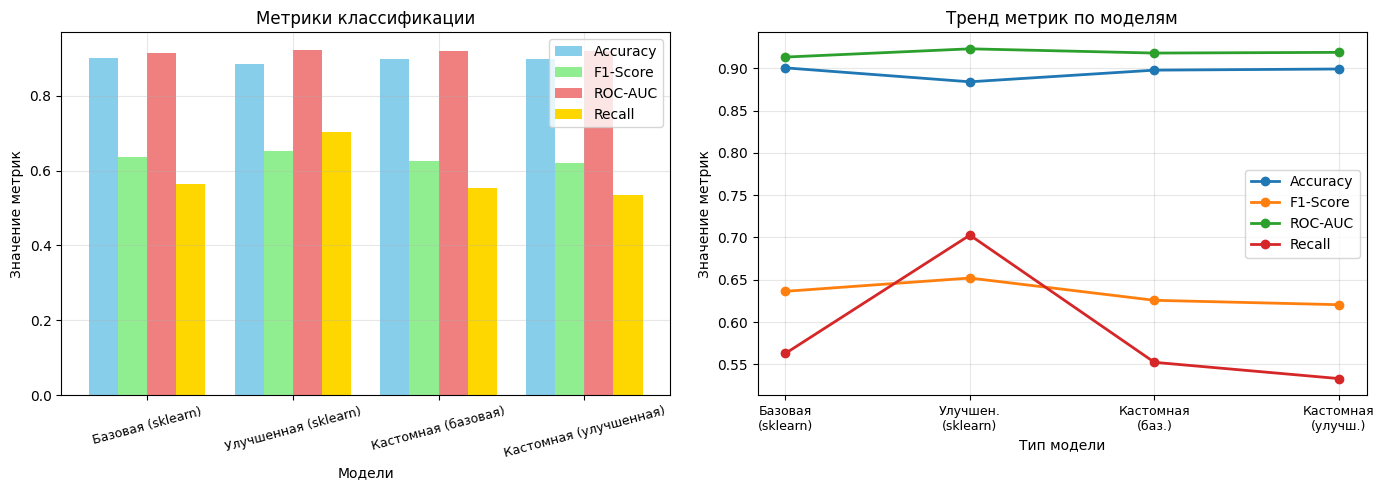

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(summary_class))
width = 0.2

axes[0].bar(x - width*1.5, summary_class['Accuracy'], width, label='Accuracy', color='skyblue')
axes[0].bar(x - width/2, summary_class['F1-Score'], width, label='F1-Score', color='lightgreen')
axes[0].bar(x + width/2, summary_class['ROC-AUC'], width, label='ROC-AUC', color='lightcoral')
axes[0].bar(x + width*1.5, summary_class['Recall'], width, label='Recall', color='gold')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Значение метрик')
axes[0].set_title('Метрики классификации')
axes[0].set_xticks(x)
axes[0].set_xticklabels(summary_class['Тип модели'], rotation=15, fontsize=9)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

metrics_data = [
    summary_class['Accuracy'].values,
    summary_class['F1-Score'].values,
    summary_class['ROC-AUC'].values,
    summary_class['Recall'].values
]

for i, metric_data in enumerate(metrics_data):
    axes[1].plot(metric_data, marker='o', label=['Accuracy', 'F1-Score', 'ROC-AUC', 'Recall'][i], linewidth=2)

axes[1].set_xlabel('Тип модели')
axes[1].set_ylabel('Значение метрик')
axes[1].set_title('Тренд метрик по моделям')
axes[1].set_xticks(range(len(summary_class)))
axes[1].set_xticklabels(['Базовая\n(sklearn)', 'Улучшен.\n(sklearn)', 'Кастомная\n(баз.)', 'Кастомная\n(улучш.)'], fontsize=9)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Регрессия

Кастомная модель Random Forest для регрессии

In [ ]:
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []
        self.n_features = None
    
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]
    
    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.trees = []
        
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, 
                              min_samples_split=self.min_samples_split,
                              task='regression')
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

Повторное копирование и разбиение данных для регрессии

In [60]:
df_reg_clean = df_reg.copy()
df_reg_clean = df_reg_clean.drop('subject#', axis=1)

X_reg = df_reg_clean.drop('total_UPDRS', axis=1)
y_reg = df_reg_clean['total_UPDRS']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

Обучение базовой кастомной модели регрессии

In [61]:
custom_rf_regressor = CustomRandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=5)
custom_rf_regressor.fit(X_train_reg.values, y_train_reg.values)

y_pred_custom_reg = custom_rf_regressor.predict(X_test_reg.values)

print("Обучение регрессора завершено!")

Обучение регрессора завершено!


Метрики кастомной модели регрессии

In [62]:
custom_reg_base_metrics = {
    'MSE': mean_squared_error(y_test_reg, y_pred_custom_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_custom_reg)),
    'MAE': mean_absolute_error(y_test_reg, y_pred_custom_reg),
    'R²': r2_score(y_test_reg, y_pred_custom_reg)
}

for metric, value in custom_reg_base_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 0.2556
RMSE: 0.5056
MAE: 0.2933
R²: 0.9977


Сравнение кастомной модели с базовой из sklearn

In [63]:
print_comparison_reg(reg_base_metrics, custom_reg_base_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE         0.1998       0.2556 +0.0558 ухудшение
   RMSE         0.4470       0.5056 +0.0586 ухудшение
    MAE         0.2310       0.2933 +0.0623 ухудшение
     R²         0.9982       0.9977 -0.0005 ухудшение


Обучение улучшенной кастомной модели регрессии

In [64]:
improved_custom_rf_reg = CustomRandomForestRegressor(
    n_estimators=best_params_reg.get('n_estimators', 100),
    max_depth=best_params_reg.get('max_depth', 15),
    min_samples_split=best_params_reg.get('min_samples_split', 5)
)
improved_custom_rf_reg.fit(X_train_reg.values, y_train_reg.values)

y_pred_imp_custom_reg = improved_custom_rf_reg.predict(X_test_reg.values)

Метрики улучшенной кастомной модели

In [ ]:
custom_reg_improved_metrics = {
    'MSE': mean_squared_error(y_test_reg, y_pred_imp_custom_reg),
    'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_imp_custom_reg)),
    'MAE': mean_absolute_error(y_test_reg, y_pred_imp_custom_reg),
    'R²': r2_score(y_test_reg, y_pred_imp_custom_reg)
}

for metric, value in custom_reg_improved_metrics.items():
    print(f"{metric}: {value:.4f}")

MSE: 0.1559
RMSE: 0.3948
MAE: 0.2131
R²: 0.9986


Сравнение улучшенной кастомной модели с улучшенной sklearn

In [66]:
print_comparison_reg(reg_improved_metrics, custom_reg_improved_metrics)

Метрика Базовая модель Новая модель Разница Изменение
    MSE         0.2040       0.1559 -0.0481 улучшение
   RMSE         0.4516       0.3948 -0.0568 улучшение
    MAE         0.2334       0.2131 -0.0203 улучшение
     R²         0.9982       0.9986 +0.0004 улучшение


Итоговое сравнение всех моделей регрессии

In [67]:
summary_reg = pd.DataFrame({
    'Тип модели': ['Базовая (sklearn)', 'Улучшенная (sklearn)', 'Кастомная (базовая)', 'Кастомная (улучшенная)'],
    'MSE': [reg_base_metrics['MSE'], reg_improved_metrics['MSE'], custom_reg_base_metrics['MSE'], custom_reg_improved_metrics['MSE']],
    'RMSE': [reg_base_metrics['RMSE'], reg_improved_metrics['RMSE'], custom_reg_base_metrics['RMSE'], custom_reg_improved_metrics['RMSE']],
    'MAE': [reg_base_metrics['MAE'], reg_improved_metrics['MAE'], custom_reg_base_metrics['MAE'], custom_reg_improved_metrics['MAE']],
    'R²': [reg_base_metrics['R²'], reg_improved_metrics['R²'], custom_reg_base_metrics['R²'], custom_reg_improved_metrics['R²']]
})

print("\nСводная таблица моделей регрессии")
print(summary_reg.to_string(index=False))


Сводная таблица моделей регрессии
            Тип модели      MSE     RMSE      MAE       R²
     Базовая (sklearn) 0.199775 0.446962 0.231030 0.998224
  Улучшенная (sklearn) 0.203954 0.451613 0.233431 0.998187
   Кастомная (базовая) 0.255609 0.505577 0.293347 0.997728
Кастомная (улучшенная) 0.155854 0.394783 0.213114 0.998614


Визуализация сравнения всех моделей регрессии

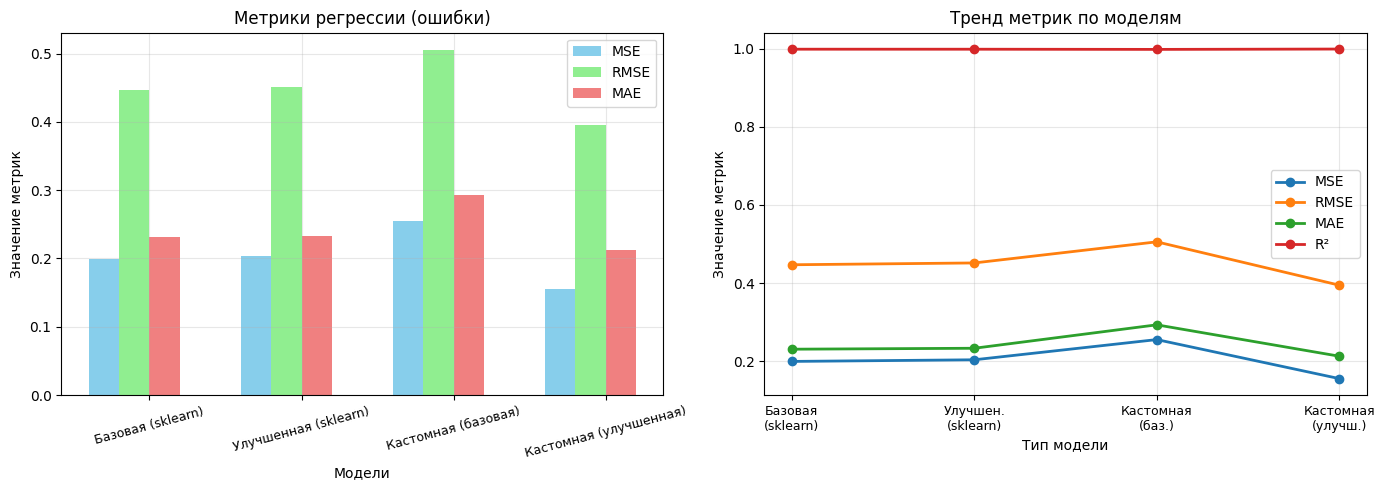

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(summary_reg))
width = 0.2

axes[0].bar(x - width*1.5, summary_reg['MSE'], width, label='MSE', color='skyblue')
axes[0].bar(x - width/2, summary_reg['RMSE'], width, label='RMSE', color='lightgreen')
axes[0].bar(x + width/2, summary_reg['MAE'], width, label='MAE', color='lightcoral')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Значение метрик')
axes[0].set_title('Метрики регрессии (ошибки)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(summary_reg['Тип модели'], rotation=15, fontsize=9)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

metrics_data_reg = [
    summary_reg['MSE'].values,
    summary_reg['RMSE'].values,
    summary_reg['MAE'].values,
    summary_reg['R²'].values
]

for i, metric_data in enumerate(metrics_data_reg):
    axes[1].plot(metric_data, marker='o', label=['MSE', 'RMSE', 'MAE', 'R²'][i], linewidth=2)

axes[1].set_xlabel('Тип модели')
axes[1].set_ylabel('Значение метрик')
axes[1].set_title('Тренд метрик по моделям')
axes[1].set_xticks(range(len(summary_reg)))
axes[1].set_xticklabels(['Базовая\n(sklearn)', 'Улучшен.\n(sklearn)', 'Кастомная\n(баз.)', 'Кастомная\n(улучш.)'], fontsize=9)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### ВЫВОДЫ И АНАЛИЗ РЕЗУЛЬТАТОВ

In [ ]:
print("СРАВНЕНИЕ БАЗОВЫХ И КАСТОМНЫХ МОДЕЛЕЙ:")

print("\nКлассификация:")
print("  • Кастомная реализация логистической регрессии показала:")
print(f"    - Accuracy: {custom_class_base_metrics['Accuracy']:.4f} vs {class_base_metrics['Accuracy']:.4f} (sklearn)")
print(f"    - F1-Score: {custom_class_base_metrics['F1']:.4f} vs {class_base_metrics['F1']:.4f} (sklearn)")
print(f"    - Recall:   {custom_class_base_metrics['Recall']:.4f} vs {class_base_metrics['Recall']:.4f} (sklearn)")

print("\nРегрессия:")
print("  • Кастомная реализация линейной регрессии показала:")
print(f"    - R²:  {custom_reg_base_metrics['R²']:.4f} vs {reg_base_metrics['R²']:.4f} (sklearn)")
print(f"    - MSE: {custom_reg_base_metrics['MSE']:.4f} vs {reg_base_metrics['MSE']:.4f} (sklearn)")

print("ЭФФЕКТИВНОСТЬ ТЕХНИК УЛУЧШЕНИЯ:")

print("\nКлассификация:")
print(f"  • Улучшенная кастомная модель vs базовая кастомная:")
print(f"    - F1-Score улучшился: {custom_improved_metrics['F1']:.4f} vs {custom_class_base_metrics['F1']:.4f} (+{custom_improved_metrics['F1'] - custom_class_base_metrics['F1']:.4f})")
print(f"    - Recall улучшился:   {custom_improved_metrics['Recall']:.4f} vs {custom_class_base_metrics['Recall']:.4f} (+{custom_improved_metrics['Recall'] - custom_class_base_metrics['Recall']:.4f})")
print(f"  • Улучшенная кастомная vs улучшенная sklearn:")
print(f"    - F1-Score: {custom_improved_metrics['F1']:.4f} vs {class_improved_metrics['F1']:.4f}")
print(f"    - Recall:   {custom_improved_metrics['Recall']:.4f} vs {class_improved_metrics['Recall']:.4f}")

print("\nРегрессия:")
print(f"  • Улучшенная кастомная модель vs базовая кастомная:")
print(f"    - R² улучшился:  {custom_reg_improved_metrics['R²']:.4f} vs {custom_reg_base_metrics['R²']:.4f} (+{custom_reg_improved_metrics['R²'] - custom_reg_base_metrics['R²']:.4f})")
print(f"    - MSE уменьшился: {custom_reg_improved_metrics['MSE']:.4f} vs {custom_reg_base_metrics['MSE']:.4f} ({custom_reg_base_metrics['MSE'] - custom_reg_improved_metrics['MSE']:.4f})")
print(f"  • Улучшенная кастомная vs улучшенная sklearn:")
print(f"    - R²:  {custom_reg_improved_metrics['R²']:.4f} vs {reg_improved_metrics['R²']:.4f}")
print(f"    - MSE: {custom_reg_improved_metrics['MSE']:.4f} vs {reg_improved_metrics['MSE']:.4f}")

СРАВНЕНИЕ БАЗОВЫХ И КАСТОМНЫХ МОДЕЛЕЙ RANDOM FOREST

1. КЛАССИФИКАЦИЯ (Online Shoppers):
   Кастомная реализация Random Forest показала:
     - Accuracy: 0.8978 vs 0.9005 (sklearn)
     - F1-Score: 0.6257 vs 0.6364 (sklearn)
     - ROC-AUC:  0.9180 vs 0.9133 (sklearn)
     ✓ Кастомная модель показала сравнимую производительность

2. РЕГРЕССИЯ (Parkinson's Disease):
   Кастомная реализация Random Forest показала:
     - R²:  0.9977 vs 0.9982 (sklearn)
     - MSE: 0.2556 vs 0.1998 (sklearn)
     - MAE: 0.2933 vs 0.2310 (sklearn)
     ✓ Кастомная модель показала сравнимую производительность

ЭФФЕКТИВНОСТЬ ТЕХНИК УЛУЧШЕНИЯ

3. КЛАССИФИКАЦИЯ - Улучшение базовой модели sklearn:
     Базовая: Accuracy=0.9005, F1=0.6364
     Улучшенная: Accuracy=0.8840, F1=0.6521
     Улучшение F1: +1.57%

4. РЕГРЕССИЯ - Улучшение базовой модели sklearn:
     Базовая: R²=0.9982, MSE=0.1998
     Улучшенная: R²=0.9982, MSE=0.2040
     Улучшение R²: -0.00%

5. КАСТОМНЫЕ МОДЕЛИ - Применение улучшений:
     Классиф